In [4]:
import glob
import os
import numpy as np
import cv2
import opencv_jupyter_ui as jcv2
from matplotlib import pyplot as plt

# -------- USER SETTINGS ----------
CALIB_DIR = "calib"

# inner corners (NOT squares). Example: a "7x5" board means (7,5) inner corners.
CHESSBOARD = (7,5)

# Square size in meters (e.g. 20 mm = 0.020)
SQUARE_SIZE = 0.010



Left corners found: True, Right corners found: True


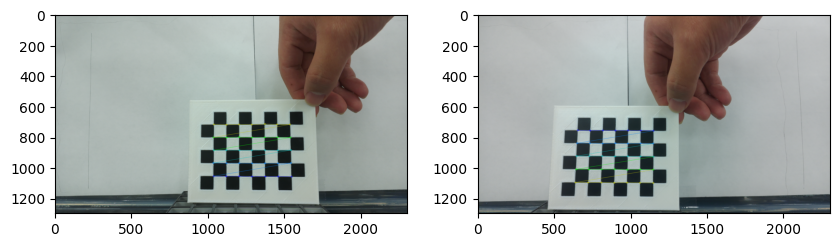

In [5]:
id=2
lp=f"calib/left_{id:02d}.png"
rp=f"calib/right_{id:02d}.png"
img_l = cv2.imread(lp, cv2.IMREAD_COLOR)
img_r = cv2.imread(rp, cv2.IMREAD_COLOR)

gray_l = cv2.cvtColor(img_l, cv2.COLOR_BGR2GRAY)
gray_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2GRAY)

flags_find = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
ret_l, corners_l = cv2.findChessboardCorners(gray_l, CHESSBOARD, flags_find)
ret_r, corners_r = cv2.findChessboardCorners(gray_r, CHESSBOARD, flags_find)
print(f"Left corners found: {ret_l}, Right corners found: {ret_r}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# plt.imshow(gray_l, cmap='gray')
# plt.title('Left Image')
# plt.subplot(1,2,2)
# plt.imshow(gray_r, cmap='gray')
criteria_subpix = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-4)
if ret_l:
    #corners_l = cv2.cornerSubPix(gray_l, corners_l, (11, 11), (-1, -1), criteria_subpix)
    vis_l = img_l.copy()
    #vis_r = img_r.copy()
    cv2.drawChessboardCorners(vis_l, CHESSBOARD, corners_l, True)
    #cv2.drawChessboardCorners(vis_r, CHESSBOARD, corners_r, True)

    plt.imshow(vis_l)
else:
    plt.imshow(img_l)


plt.subplot(1,2,2)
if ret_r:
    #corners_r = cv2.cornerSubPix(gray_r, corners_r, (11, 11), (-1, -1), criteria_subpix)
    vis_r = img_r.copy()
    #vis_r = img_r.copy()
    cv2.drawChessboardCorners(vis_r, CHESSBOARD, corners_r, True)
    #cv2.drawChessboardCorners(vis_r, CHESSBOARD, corners_r, True)

    plt.imshow(vis_r)
else:
    plt.imshow(img_r)

In [13]:
import numpy as np
d=np.load("stereo_calib_charuco.npz", allow_pickle=True)
K=d["K_l"]
K_r=d["K_r"]
T=d["T"]
print("fx:", K[0,0], "fy:", K[1,1])
print("baseline (same units as square_size):", float((T**2).sum()**0.5))
print("T:", T.ravel())


fx: 1770.4298068436387 fy: 1765.231698815802
baseline (same units as square_size): 0.04066882709661785
T: [-4.06682162e-02  1.03676160e-05 -2.22675305e-04]


In [14]:
K_l=d["K_l"]
K_r=d["K_r"]
print("Left camera intrinsics:\n", K_l)
print("Right camera intrinsics:\n", K_r)

D_l=d["D_l"]
D_r=d["D_r"]
print("Left camera distortion coefficients:\n", D_l.ravel())
print("Right camera distortion coefficients:\n", D_r.ravel())

Left camera intrinsics:
 [[1.77042981e+03 0.00000000e+00 1.10506701e+03]
 [0.00000000e+00 1.76523170e+03 6.39498284e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Right camera intrinsics:
 [[1.75560590e+03 0.00000000e+00 1.11126093e+03]
 [0.00000000e+00 1.75916367e+03 6.32984276e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Left camera distortion coefficients:
 [-0.00354393  0.26245601 -0.00150794 -0.01196292 -0.53888139]
Right camera distortion coefficients:
 [-0.00162382  0.3404086  -0.00351119 -0.00966793 -0.91048272]


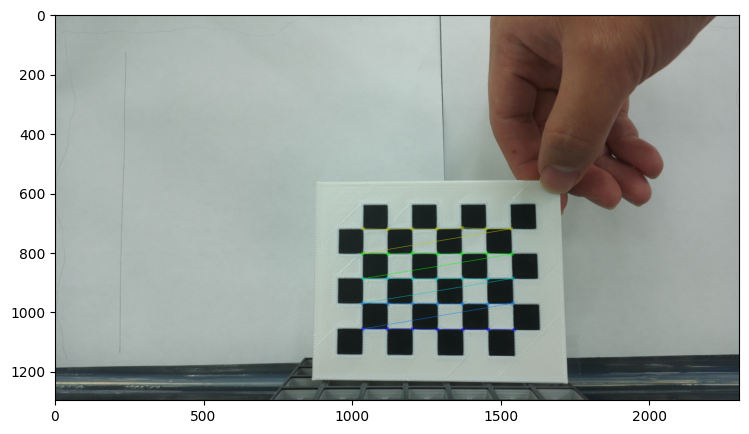

In [5]:
id=2
lp=f"calib/left_{id:02d}.png"
rp=f"calib/right_{id:02d}.png"
img_l = cv2.imread(lp, cv2.IMREAD_COLOR)

gray_l = cv2.cvtColor(img_l, cv2.COLOR_BGR2GRAY)

flags_find = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
ret_l, corners_l = cv2.findChessboardCorners(gray_l, CHESSBOARD, flags_find)

# window_name = "Small Window"
# cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
# cv2.resizeWindow(window_name, 300, 200)
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
# plt.imshow(gray_l, cmap='gray')
# plt.title('Left Image')
# plt.subplot(1,2,2)
# plt.imshow(gray_r, cmap='gray')
criteria_subpix = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-4)
if ret_l:
    #corners_l = cv2.cornerSubPix(gray_l, corners_l, (11, 11), (-1, -1), criteria_subpix)
    vis_l = img_l.copy()
    #vis_r = img_r.copy()
    cv2.drawChessboardCorners(vis_l, CHESSBOARD, corners_l, True)
    #cv2.drawChessboardCorners(vis_r, CHESSBOARD, corners_r, True)

    #jcv2.imshow(window_name, vis_l)
    plt.imshow(vis_l)

# else:
#     plt.imshow(img_l)



In [12]:
id=0
lp=f"calib/left_{id:02d}.png"
rp=f"calib/right_{id:02d}.png"
img_l = cv2.imread(lp, cv2.IMREAD_COLOR)

gray_l = cv2.cvtColor(img_l, cv2.COLOR_BGR2GRAY)
ARUCO_DICT = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)
board = cv2.aruco.CharucoBoard(
    (8, 6),
    squareLength=0.01,
    markerLength=0.007,
    dictionary=ARUCO_DICT
)
board.setLegacyPattern(True)

detector_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.CharucoDetector(board)

# marker_corners, marker_ids, rejected = detector.detectMarkers(gray_l)
# print("Detected marker IDs:", marker_ids.ravel())

charuco_corners, charuco_ids, marker_corners, marker_ids = detector.detectBoard(gray_l)